In [1]:
import pandas as pd

In [36]:
fake = pd.read_csv("News _dataset/Fake.csv")
true = pd.read_csv("News _dataset/True.csv")

In [37]:
fake['fake'] = 1
true['fake'] = 0

In [38]:
data = pd.concat([fake, true], axis=0, ignore_index=True)

In [5]:
data.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
data.columns

Index(['title', 'text', 'subject', 'date', 'fake'], dtype='object')

In [39]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

text = data['text'].astype(str).tolist()

embeddings = model.encode(text, batch_size=32, show_progress_bar=True)


data['text_embeddings'] = embeddings.tolist()


Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

In [40]:
data

,title,text,subject,date,fake,text_embeddings
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,"[-0.0043214429169893265, 0.026716530323028564,..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,"[-0.03831436112523079, -0.006242824252694845, ..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,"[-0.04959167540073395, -0.0035074781626462936,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,"[0.055925313383340836, 0.027903396636247635, 0..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,"[0.051732420921325684, 0.1389531046152115, 0.0..."
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,"[0.008612270466983318, -0.03016754984855652, 0..."
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,"[-0.0009445600444450974, -0.004879869055002928..."
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,"[0.09308017790317535, 0.011523131281137466, -0..."
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,"[0.011800680309534073, -0.060749173164367676, ..."


In [41]:
emb_dim = embeddings.shape[1]
emb_cols = [f"emb_{i}" for i in range(emb_dim)]
# make a DataFrame of shape (n_samples, emb_dim)
emb_df = pd.DataFrame(embeddings, columns=emb_cols)
# concatenate back onto your original data
data = pd.concat([data.reset_index(drop=True), emb_df], axis=1)

In [42]:
data

,title,text,subject,date,fake,text_embeddings,emb_0,emb_1,emb_2,emb_3,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,"[-0.0043214429169893265, 0.026716530323028564,...",-0.004321,0.026717,0.127427,-0.057765,...,0.088579,0.013022,-0.005866,0.009871,0.019463,0.016811,0.091311,0.006232,-0.034599,0.043389
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,"[-0.03831436112523079, -0.006242824252694845, ...",-0.038314,-0.006243,0.009679,-0.011508,...,0.066341,0.002716,0.039547,0.012695,-0.074682,-0.035525,0.048683,0.012260,0.101146,-0.073128
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,"[-0.04959167540073395, -0.0035074781626462936,...",-0.049592,-0.003507,-0.091413,-0.010173,...,0.016751,-0.001126,-0.031805,0.018539,-0.071581,0.086039,0.007832,-0.051993,-0.017201,-0.027261
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,"[0.055925313383340836, 0.027903396636247635, 0...",0.055925,0.027903,0.042333,-0.009451,...,0.073321,-0.002406,0.009133,-0.038742,-0.060905,-0.012660,0.030724,-0.063169,-0.016119,0.074850
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,"[0.051732420921325684, 0.1389531046152115, 0.0...",0.051732,0.138953,0.054981,0.007881,...,0.060216,0.021472,0.000855,0.012792,0.050149,0.026531,0.045585,-0.026374,0.011113,0.012908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,"[0.008612270466983318, -0.03016754984855652, 0...",0.008612,-0.030168,0.069717,-0.006638,...,0.034135,-0.005449,0.005739,-0.024852,-0.013843,-0.006719,-0.037419,-0.091711,-0.006052,0.027826
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,"[-0.0009445600444450974, -0.004879869055002928...",-0.000945,-0.004880,0.057495,-0.010990,...,-0.063982,0.008555,-0.052453,0.037686,-0.046271,-0.033328,0.031331,-0.086346,0.068403,0.055953
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,"[0.09308017790317535, 0.011523131281137466, -0...",0.093080,0.011523,-0.060489,-0.009899,...,0.053014,-0.025831,-0.048915,-0.063746,0.005861,0.053194,-0.054420,-0.043430,0.033201,-0.066300
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,"[0.011800680309534073, -0.060749173164367676, ...",0.011801,-0.060749,-0.026657,0.028113,...,-0.016320,0.025324,0.002365,-0.001803,-0.030594,-0.070363,-0.098698,-0.090297,-0.043703,-0.049771


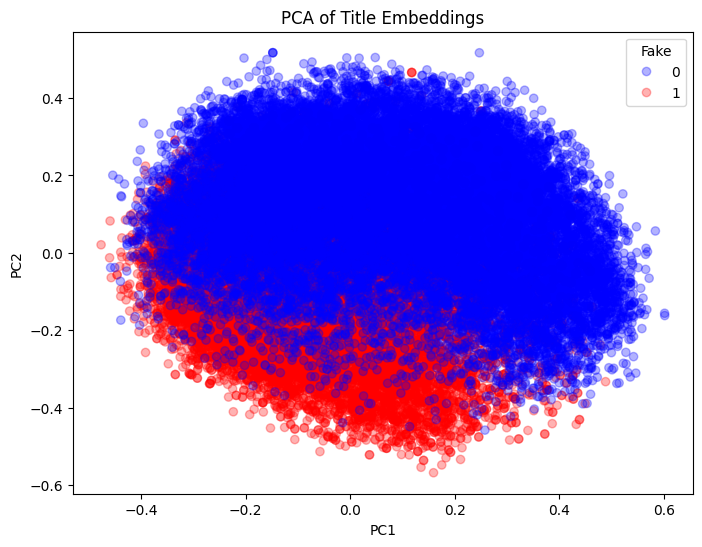

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# prepare feature matrix and labels
feature_cols = [col for col in data.columns if col.startswith("emb_")]
X = data[feature_cols].values
y = data['fake'].astype(int).values

# run PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='bwr', alpha=0.3
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Title Embeddings')
plt.legend(*scatter.legend_elements(), title='Fake')
plt.show()


In [44]:
# 3) Logistic Regression on the 2D PCA space
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train
clf = LogisticRegression()
clf.fit(X_train, y_train)

# predict & evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9582405345211581

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4247
           1       0.96      0.96      0.96      4733

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [ ]:
import numpy as np
np.bool = bool
np.int = int
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


In [48]:
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.5, random_state=42, stratify=y_tmp
)

# ———————— 2) Build the MLP classifier ————————
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adamW',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ———————— 3) Train ————————
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

# ———————— 4) Evaluate ————————
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,601 (225.00 KB)

 Trainable params: 57,601 (225.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8939 - loss: 0.2703 - val_accuracy: 0.9626 - val_loss: 0.1049
Epoch 2/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9608 - loss: 0.0997 - val_accuracy: 0.9644 - val_loss: 0.0949
Epoch 3/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9677 - loss: 0.0898 - val_accuracy: 0.9670 - val_loss: 0.0958
Epoch 4/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9678 - loss: 0.0868 - val_accuracy: 0.9666 - val_loss: 0.0940
Epoch 5/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9658 - loss: 0.0921 - val_accuracy: 0.9675 - val_loss: 0.0894
Epoch 6/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9660 - loss: 0.0925 - val_accuracy: 0.9630 - val_loss: 0.0931
Epoch 7/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9631 - loss: 0.1009 - val_accuracy: 0.9517 - val_loss: 0.1244
Epoch 8/10
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9641 - loss: 0.0992 - val_accuracy: 0

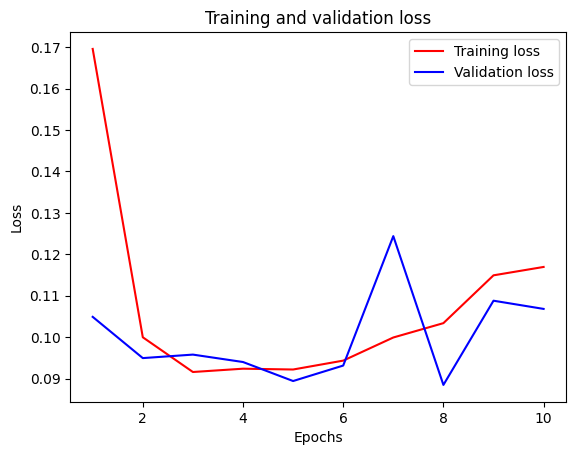

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()